In [17]:
import matplotlib.pyplot as plt
import numpy as np

def simulate_ecosystem(food_availability):

        # 模拟七鳃鳗雄性比例的变化
    if food_availability == 'low':
        initial_ratio = 0.22 
    elif food_availability == 'high':
        initial_ratio = 0.56  
    else:
        raise ValueError("Invalid gender ratio variation")
    

    generations = 50
    gender_ratio = np.zeros(generations)
    gender_ratio[0] = initial_ratio
    predator_population = np.ones(generations)
    reproductive_success = np.ones(generations)
    food_resources = np.ones(generations)
    composite_indicator = np.zeros(generations)
    parasite_population = np.zeros(generations)

    # Simulate gender ratio changes in response to food availability
    for gen in range(1, generations):
        if food_availability == 'low':
            gender_ratio[gen] = gender_ratio[gen - 1] + 0.01
            # 模拟繁殖成功率的变化
            reproductive_success[gen] = reproductive_success[gen - 1] - 0.005 * abs(gender_ratio[gen] - 0.5)
            # 模拟捕食者数量的变化
            predator_population[gen] = predator_population[gen - 1] * reproductive_success[gen] 
            # 模拟食物资源的变化
            food_resources[gen] = food_resources[gen - 1] - 0.02
            # 模拟寄生虫数量的变化
            parasite_population[gen] = parasite_population[gen - 1] + np.random.normal(loc=0, scale=0.1)
            # 计算综合指标(加权求和)，增加对性的权重
            # 这里简单地加权求和，你可以根据实际情况调整权重
            composite_indicator[gen] = 0.3 * gender_ratio[gen] + 0.4 * predator_population[gen] + 0.2 * reproductive_success[gen] + 0.1 * food_resources[gen] - 0.5 * parasite_population[gen]
        elif food_availability == 'high':
            gender_ratio[gen] = gender_ratio[gen - 1] - 0.01
            # 模拟繁殖成功率的变化
            reproductive_success[gen] = reproductive_success[gen - 1] - 0.005 * abs(gender_ratio[gen] - 0.5)
            # 模拟捕食者数量的变化
            predator_population[gen] = predator_population[gen - 1] * reproductive_success[gen] 
            # 模拟食物资源的变化
            food_resources[gen] = food_resources[gen - 1] + 0.02
            # 模拟寄生虫数量的变化
            parasite_population[gen] = parasite_population[gen - 1] + np.random.normal(loc=0, scale=0.1)
            # 计算综合指标(加权求和)，增加对性的权重
            # 这里简单地加权求和，你可以根据实际情况调整权重
            composite_indicator[gen] = 0.3 * gender_ratio[gen] + 0.4 * predator_population[gen] + 0.2 * reproductive_success[gen] + 0.1 * food_resources[gen] - 0.5 * parasite_population[gen]

    return gender_ratio, predator_population, reproductive_success, food_resources

# Simulate gender ratio for low and high food availability
low_food_gender_ratio, low_food_predator_population, low_food_reproductive_success, low_food_resources = simulate_ecosystem('low')
print('-------------------')
high_food_gender_ratio, high_food_predator_population, high_food_reproductive_success, high_food_resources= simulate_ecosystem('high')


-------------------


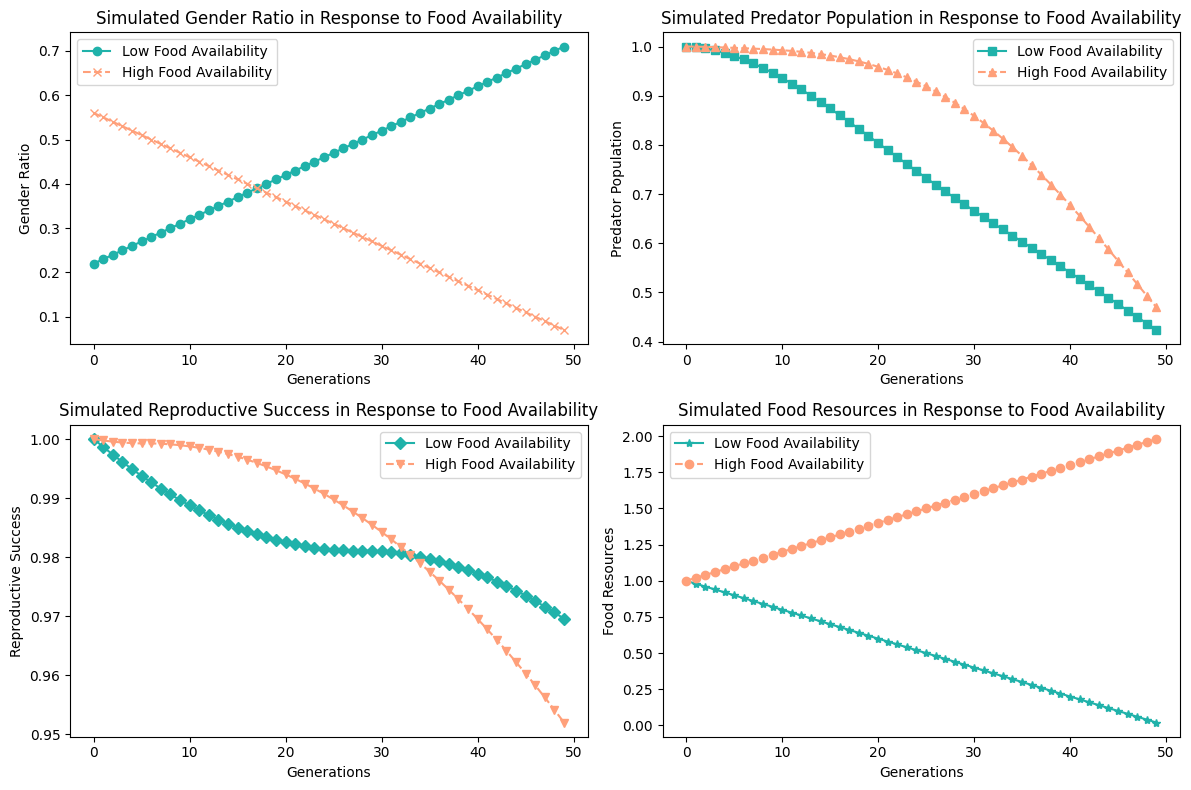

In [18]:
generations = np.arange(50)
plt.figure(figsize=(12, 8))

# Gender ratio plot
plt.subplot(2, 2, 1)
plt.plot(generations, low_food_gender_ratio, label='Low Food Availability', linestyle='-', marker='o', color='lightseagreen')
plt.plot(generations, high_food_gender_ratio, label='High Food Availability', linestyle='--', marker='x', color='lightsalmon')
plt.title('Simulated Gender Ratio in Response to Food Availability')
plt.xlabel('Generations')
plt.ylabel('Gender Ratio')
plt.legend()

# Predator population plot
plt.subplot(2, 2, 2)
plt.plot(generations, low_food_predator_population, label='Low Food Availability', linestyle='-', marker='s', color='lightseagreen')
plt.plot(generations, high_food_predator_population, label='High Food Availability', linestyle='--', marker='^', color='lightsalmon')
plt.title('Simulated Predator Population in Response to Food Availability')
plt.xlabel('Generations')
plt.ylabel('Predator Population')
plt.legend()

# Reproductive success plot
plt.subplot(2, 2, 3)
plt.plot(generations, low_food_reproductive_success, label='Low Food Availability', linestyle='-', marker='D', color='lightseagreen')
plt.plot(generations, high_food_reproductive_success, label='High Food Availability', linestyle='--', marker='v', color='lightsalmon')
plt.title('Simulated Reproductive Success in Response to Food Availability')
plt.xlabel('Generations')
plt.ylabel('Reproductive Success')
plt.legend()

# Food resources plot
plt.subplot(2, 2, 4)
plt.plot(generations, low_food_resources, label='Low Food Availability', linestyle='-', marker='*', color='lightseagreen')
plt.plot(generations, high_food_resources, label='High Food Availability', linestyle='--', marker='o', color='lightsalmon')
plt.title('Simulated Food Resources in Response to Food Availability')
plt.xlabel('Generations')
plt.ylabel('Food Resources')
plt.legend()

plt.tight_layout()
plt.show()